In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("play_tennis.csv")

In [20]:
# Melihat beberapa baris pertama data
print(df.head())

# Memeriksa jumlah baris dan kolom
print(df.shape)

# Memeriksa distribusi label target
print(df['PlayTennis'].value_counts())


    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes
(14, 5)
PlayTennis
Yes    9
No     5
Name: count, dtype: int64


In [21]:
# Fitur (X) dan target (y)
X = df.drop("PlayTennis", axis=1)
y = df["PlayTennis"]

In [22]:
# Encoding variabel kategori menjadi numerik
X = pd.get_dummies(X, drop_first=True)

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Melatih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [24]:
# Membuat prediksi pada data uji
y_pred = model.predict(X_test)


In [25]:
# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")


Akurasi: 0.33


In [26]:
# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[0 1]
 [1 1]]


In [27]:
# Menampilkan metrik klasifikasi
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [28]:
def preprocess_data(df):
# Cek duplikat
    duplicate_count = df.duplicated().sum()
    print(f"Jumlah duplikat ditemukan: {duplicate_count}")

    # Jika ada duplikat, hapus
    if duplicate_count > 0:
        df = df.drop_duplicates()
        print(f"Duplikat telah dihapus. Data bersih memiliki {len(df)} baris.")
    else:
        print("Tidak ada duplikat dalam data.")

    # Cek dan tangani missing values
    missing_count = df.isnull().sum().sum()
    print(f"Jumlah nilai yang hilang: {missing_count}")
    
    return df

# Preprocessing pada dataset
df_cleaned = preprocess_data(df)

Jumlah duplikat ditemukan: 0
Tidak ada duplikat dalam data.
Jumlah nilai yang hilang: 0


In [29]:
# Data baru
new_data = {
    "Outlook": "Sunny",
    "Temperature": "Cool",
    "Humidity": "High",
    "Wind": "Strong"
}

In [30]:
    # Identifikasi distribusi
    print("\nDistribusi Data:")
    for column in df.columns:
        if df[column].dtype == "object":
            print(f"- {column}: Kategori ({df[column].nunique()} unik)")
        else:
            print(f"- {column}: Numerik (Rata-rata: {df[column].mean():.2f}, Median: {df[column].median():.2f})")



Distribusi Data:
- Outlook: Kategori (3 unik)
- Temperature: Kategori (3 unik)
- Humidity: Kategori (2 unik)
- Wind: Kategori (2 unik)
- PlayTennis: Kategori (2 unik)


In [31]:
# --- Naive Bayes ---
# Fungsi untuk menghitung probabilitas kondisional
def conditional_probability(df, feature, value, target_class):
    filtered_df = df[df["PlayTennis"] == target_class]
    return len(filtered_df[filtered_df[feature] == value]) / len(filtered_df) if len(filtered_df) > 0 else 0

# Fungsi untuk menghitung probabilitas Naive Bayes
def naive_bayes_probabilities(df, new_data):
    # Hitung prior probabilities
    prior_yes = len(df[df["PlayTennis"] == "Yes"]) / len(df)
    prior_no = len(df[df["PlayTennis"] == "No"]) / len(df)

    # Hitung probabilitas kondisional untuk Yes dan No
    cond_yes = 1
    cond_no = 1
    prob_yes = []
    prob_no = []

    for feature, value in new_data.items():
        prob_yes_feature = conditional_probability(df, feature, value, "Yes")
        prob_no_feature = conditional_probability(df, feature, value, "No")
        prob_yes.append(prob_yes_feature)
        prob_no.append(prob_no_feature)
        cond_yes *= prob_yes_feature
        cond_no *= prob_no_feature

    # Hitung probabilitas akhir menggunakan Teorema Bayes
    final_yes = cond_yes * prior_yes
    final_no = cond_no * prior_no

    return final_yes, final_no, prob_yes, prob_no, prior_yes, prior_no

# Hitung probabilitas
final_yes, final_no, prob_yes, prob_no, prior_yes, prior_no = naive_bayes_probabilities(df_cleaned, new_data)


Jumlah duplikat ditemukan: 0
Tidak ada duplikat dalam data.
Jumlah nilai yang hilang: 0
==== Visualisasi Data ====


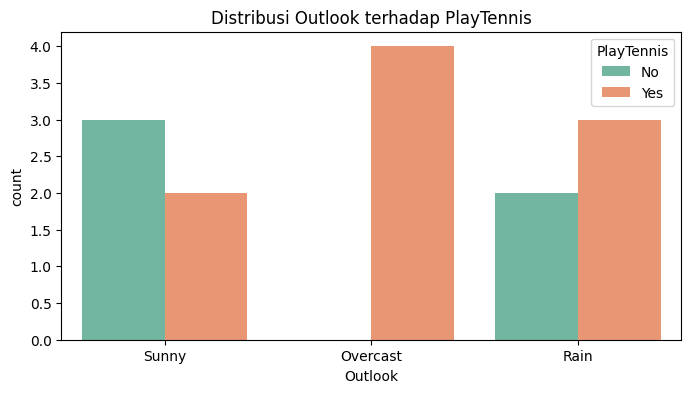

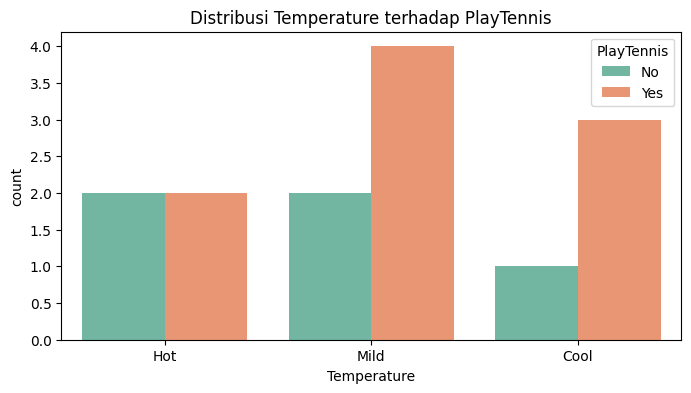

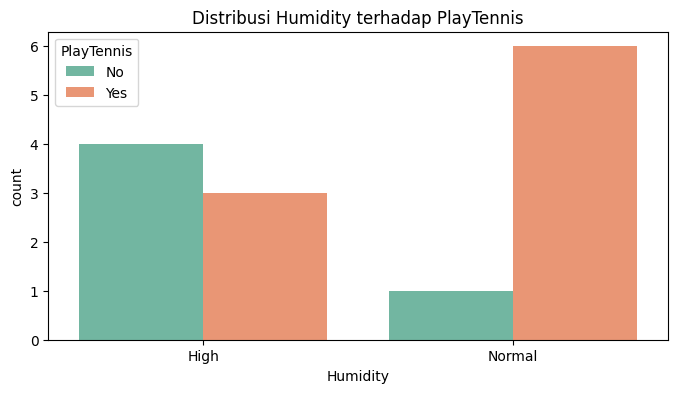

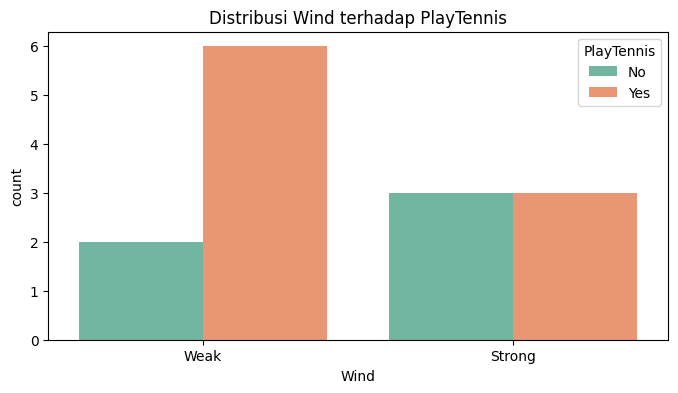

In [32]:
# --- Visualisasi Distribusi Data ---
def visualize_data(df):
    print("==== Visualisasi Data ====")
    for column in df.columns[:-1]:  # Exclude target
        plt.figure(figsize=(8, 4))
        if df[column].dtype == "object":
            sns.countplot(data=df, x=column, hue="PlayTennis", palette="Set2")
            plt.title(f"Distribusi {column} terhadap PlayTennis")
        else:
            sns.histplot(data=df, x=column, hue="PlayTennis", kde=True, palette="Set2")
            plt.title(f"Distribusi {column} terhadap PlayTennis")
        plt.show()

# --- Priors dan Kustomisasi ---
def calculate_custom_priors(df, custom_priors=None):
    if custom_priors:
        prior_yes, prior_no = custom_priors
        print(f"Custom Priors digunakan: P(Yes)={prior_yes}, P(No)={prior_no}")
    else:
        prior_yes = len(df[df["PlayTennis"] == "Yes"]) / len(df)
        prior_no = len(df[df["PlayTennis"] == "No"]) / len(df)
        print(f"Default Priors: P(Yes)={prior_yes}, P(No)={prior_no}")
    return prior_yes, prior_no

# --- Integrasi Baru ke Workflow ---
# Preprocessing dengan parameter baru
df_visu = preprocess_data(df)

# Visualisasi distribusi
visualize_data(df_visu)


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

def calculate_feature_priors(df):
    print("\n==== Prior untuk Setiap Atribut ====")
    feature_priors = {}

    for column in df.columns[:-1]:  # Exclude target column
        priors = {}
        unique_values = df[column].unique()
        for value in unique_values:
            prob_yes = len(df[(df[column] == value) & (df["PlayTennis"] == "Yes")]) / len(df[df["PlayTennis"] == "Yes"])
            prob_no = len(df[(df[column] == value) & (df["PlayTennis"] == "No")]) / len(df[df["PlayTennis"] == "No"])
            priors[value] = {"P(Yes|Feature)": prob_yes, "P(No|Feature)": prob_no}
        feature_priors[column] = priors
        print(f"\nAtribut '{column}':")
        for value, probs in priors.items():
            # Perbaiki penulisan key pada dictionary
            print(f"  - {value}: P(Yes|Feature)={probs['P(Yes|Feature)']:.2f}, P(No|Feature)={probs['P(No|Feature)']:.2f}")

    return feature_priors

# Hitung prior untuk setiap atribut dan tampilkan visualisasi
feature_priors = calculate_feature_priors(df_cleaned)



==== Prior untuk Setiap Atribut ====

Atribut 'Outlook':
  - Sunny: P(Yes|Feature)=0.22, P(No|Feature)=0.60
  - Overcast: P(Yes|Feature)=0.44, P(No|Feature)=0.00
  - Rain: P(Yes|Feature)=0.33, P(No|Feature)=0.40

Atribut 'Temperature':
  - Hot: P(Yes|Feature)=0.22, P(No|Feature)=0.40
  - Mild: P(Yes|Feature)=0.44, P(No|Feature)=0.40
  - Cool: P(Yes|Feature)=0.33, P(No|Feature)=0.20

Atribut 'Humidity':
  - High: P(Yes|Feature)=0.33, P(No|Feature)=0.80
  - Normal: P(Yes|Feature)=0.67, P(No|Feature)=0.20

Atribut 'Wind':
  - Weak: P(Yes|Feature)=0.67, P(No|Feature)=0.40
  - Strong: P(Yes|Feature)=0.33, P(No|Feature)=0.60


In [34]:

# --- Hasil ---
# Tampilkan hasil probabilitas akhir
print(f"Probabilitas 'Yes': {final_yes:.4f}")
print(f"Probabilitas 'No': {final_no:.4f}")

# Tentukan hasil klasifikasi
if final_yes > final_no:
    print("Hasil Klasifikasi: Yes")
else:
    print("Hasil Klasifikasi: No")


Probabilitas 'Yes': 0.0053
Probabilitas 'No': 0.0206
Hasil Klasifikasi: No
